In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = {}

def importData(filename):

    f = open(filename, "r")
    temperature = float(f.readline().strip("Temperature "))
    df = pd.read_csv(filename, skiprows=1)
    return temperature, df

for i in range(15):
    temperature, df = importData("output/temperature_%s.csv" % i)
    data[temperature] = df


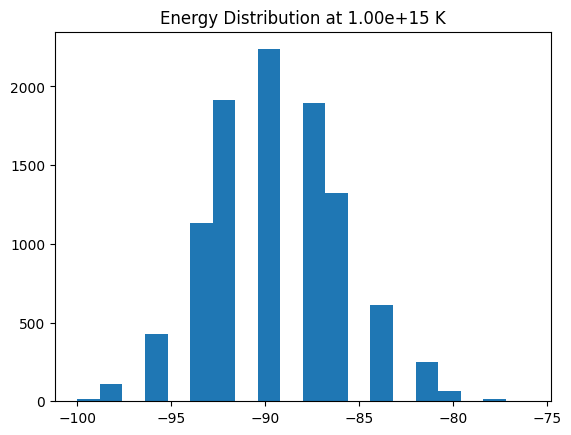

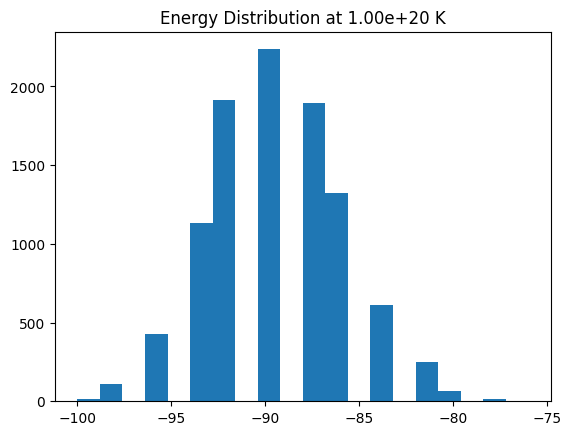

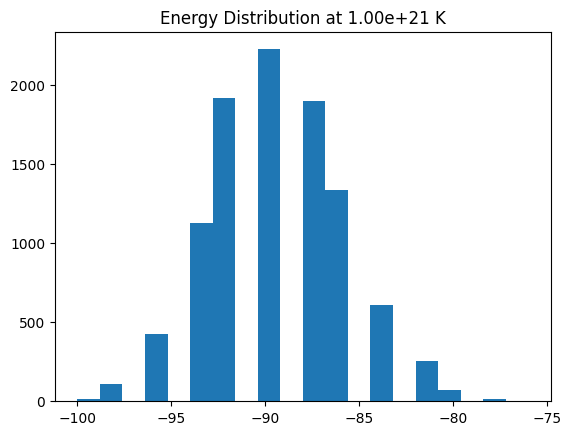

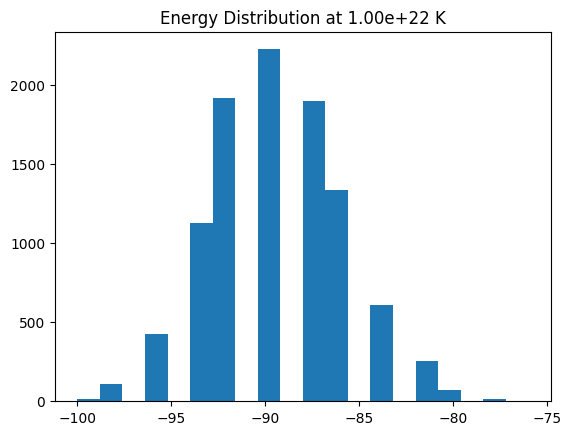

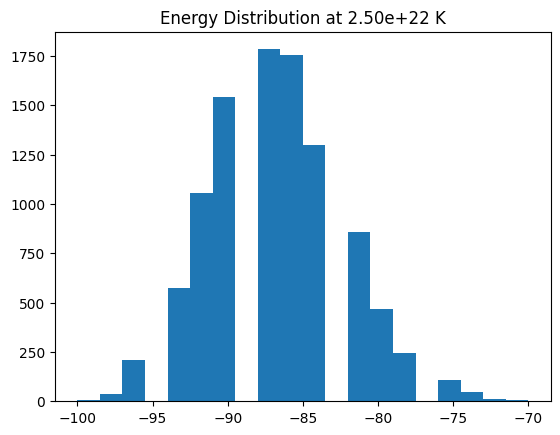

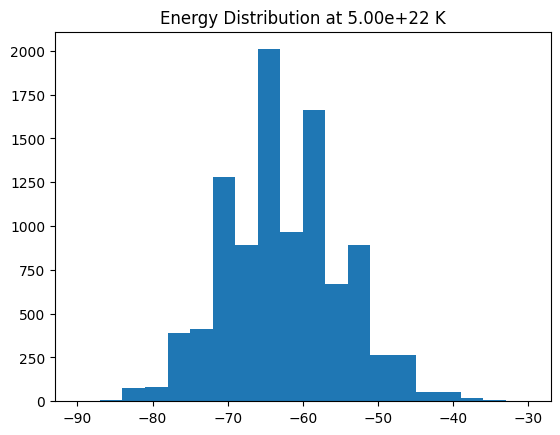

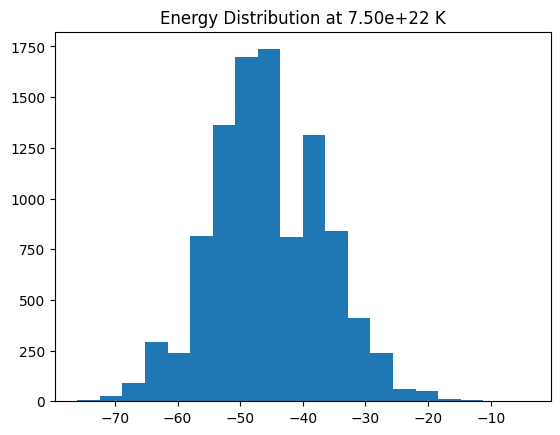

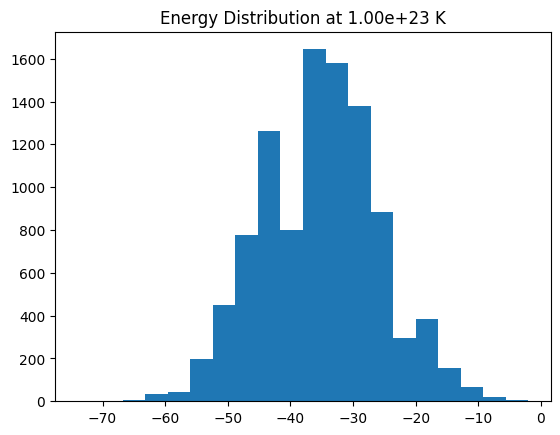

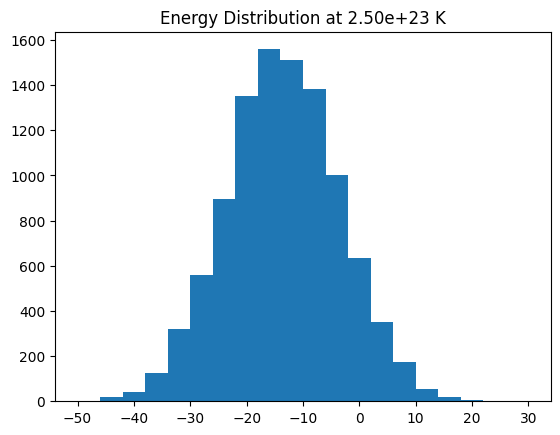

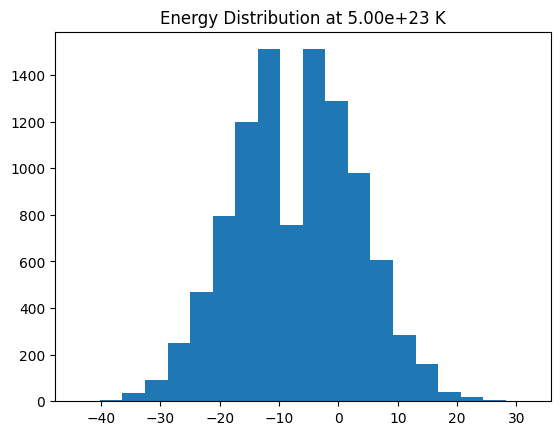

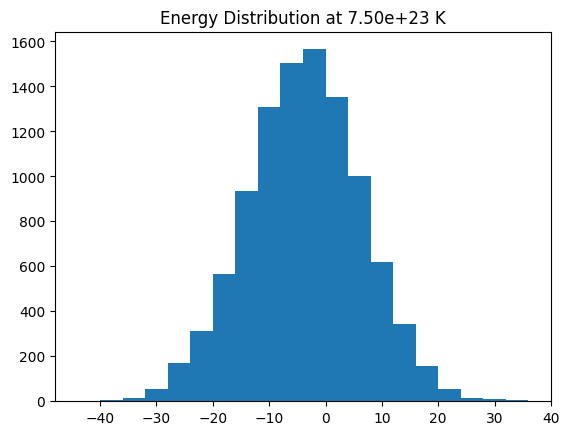

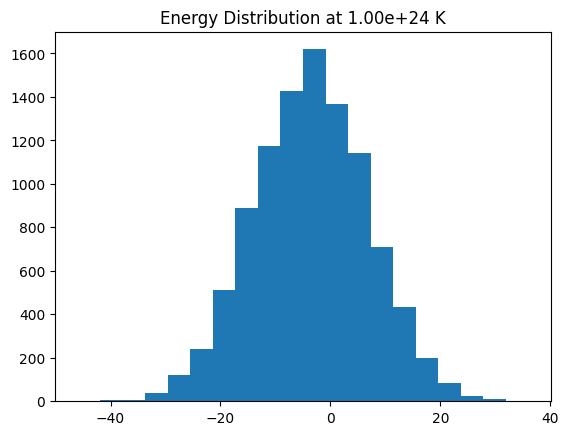

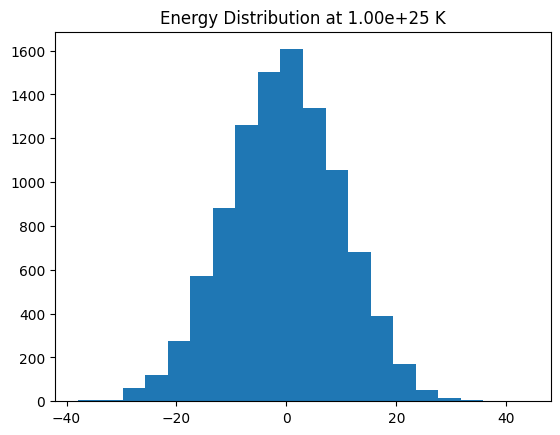

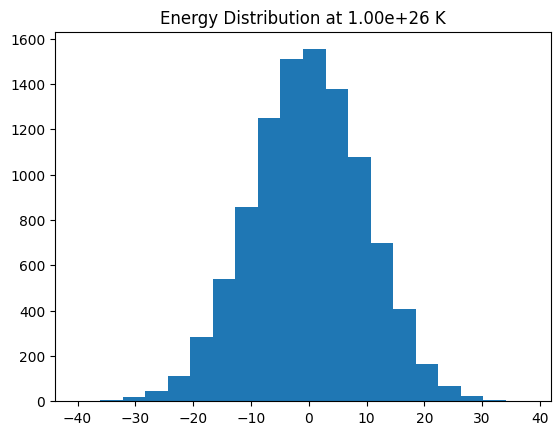

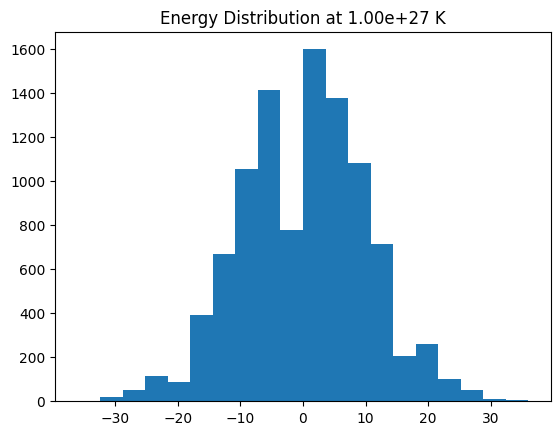

In [3]:
for temperature in data.keys():

    fig, ax = plt.subplots()
    df = data[temperature]
    ax.hist(df["energy"], bins=20)
    ax.set_title(f"Energy Distribution at %s K" % "{:.2e}".format(temperature))


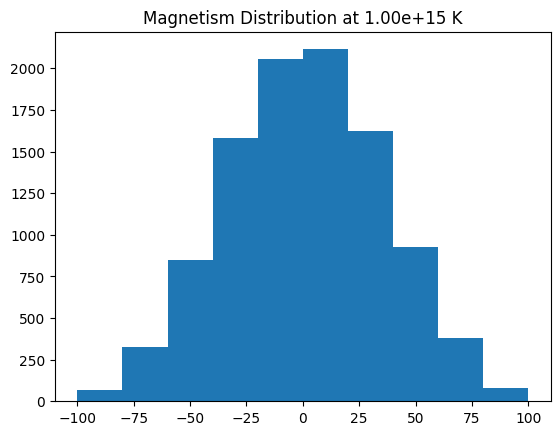

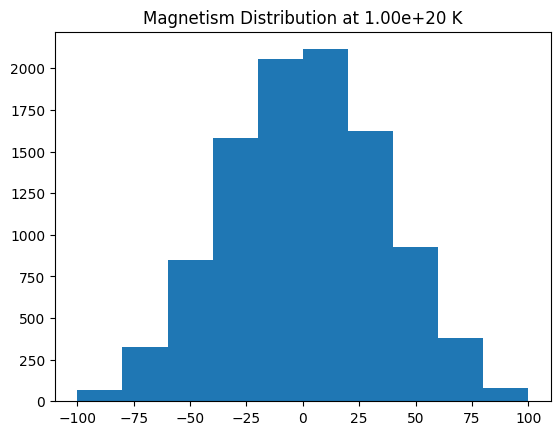

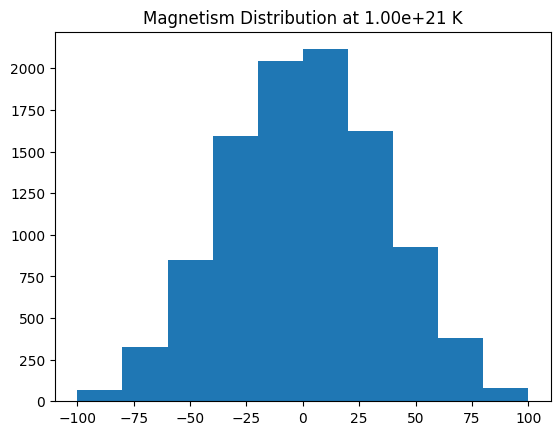

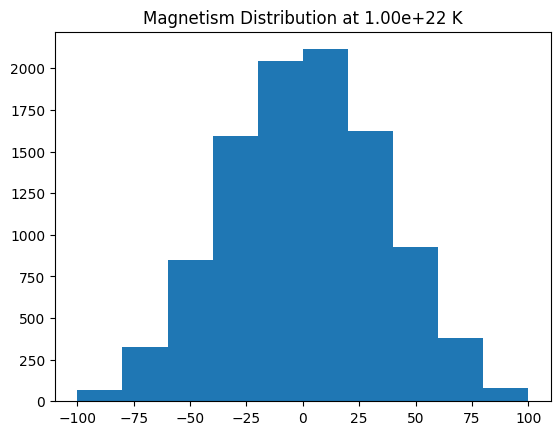

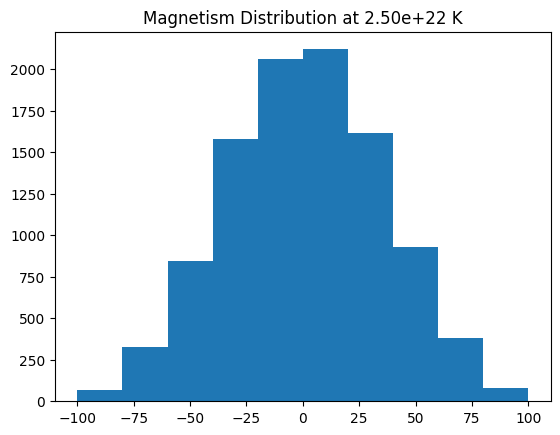

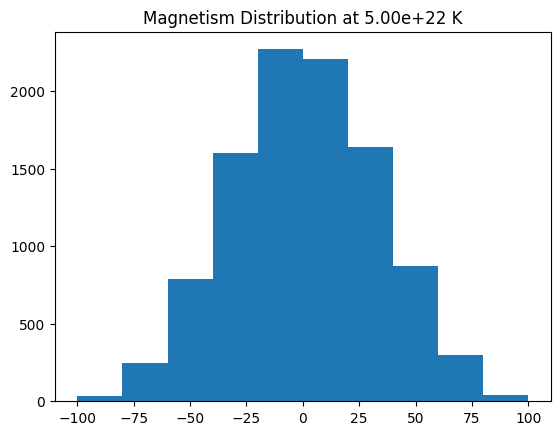

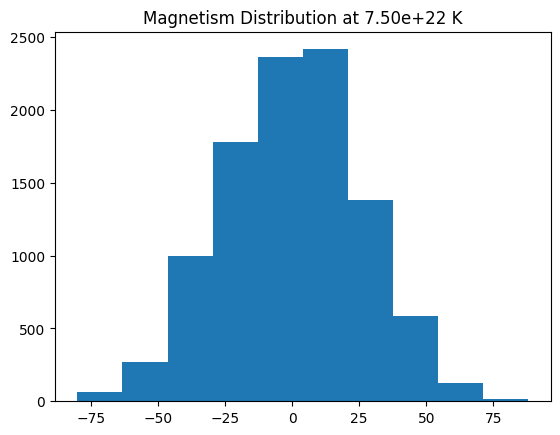

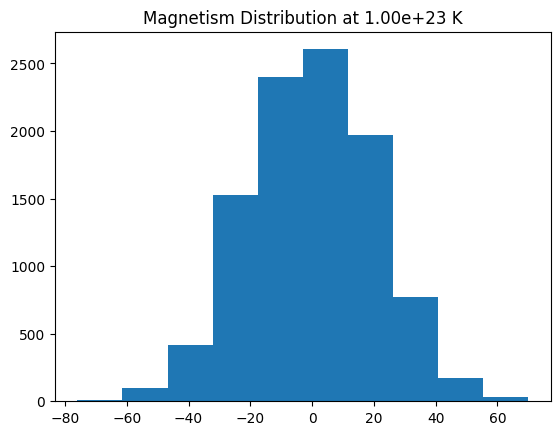

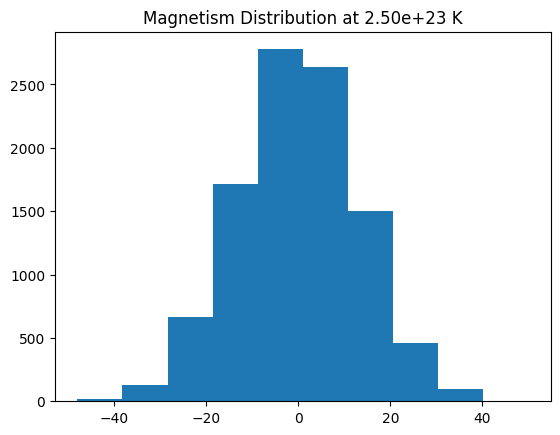

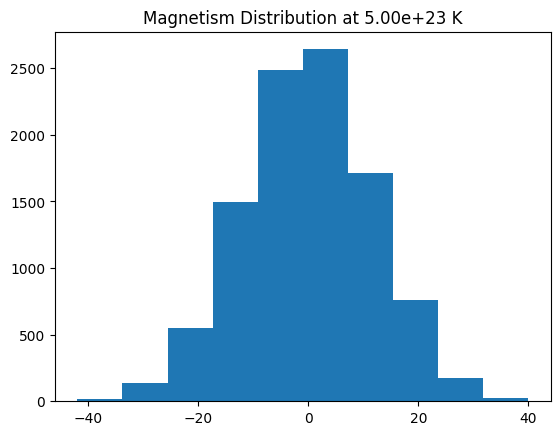

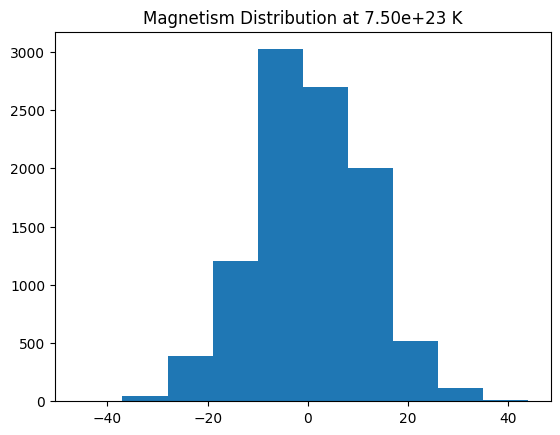

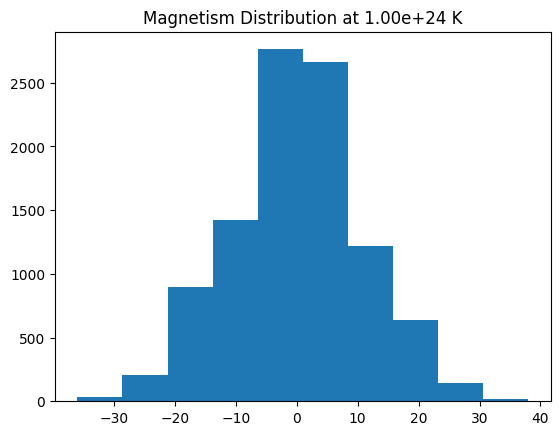

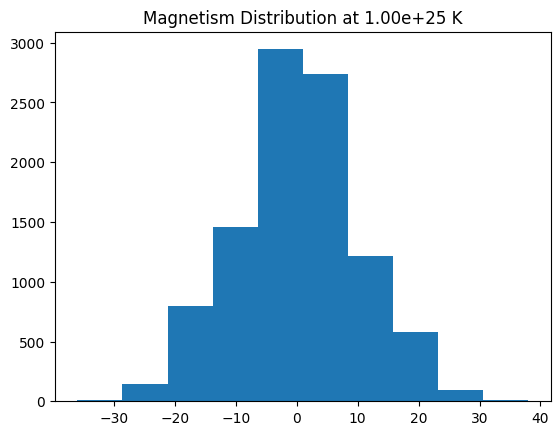

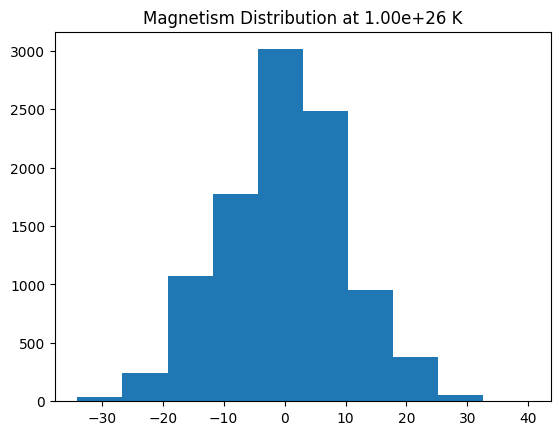

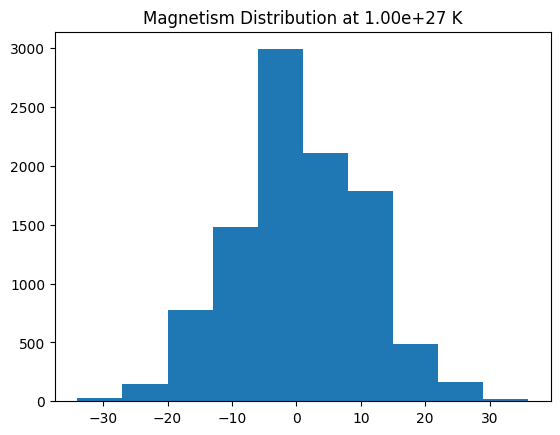

In [9]:
for temperature in data.keys():

    fig, ax = plt.subplots()
    df = data[temperature]
    ax.hist(df["magnetism"])
    ax.set_title(f"Magnetism Distribution at %s K" % "{:.2e}".format(temperature))

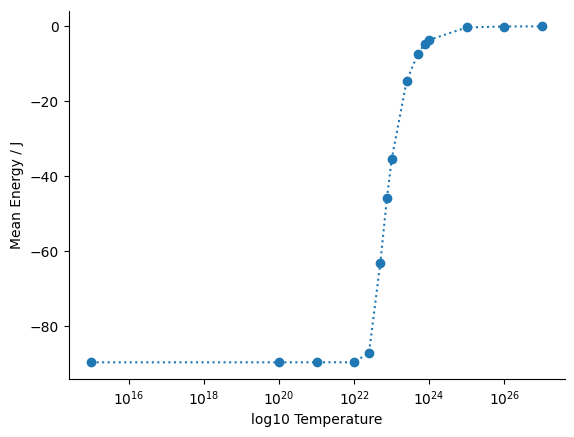

In [4]:
fig, ax = plt.subplots()

mean_energies = []

for temp in data.keys():
    mean_energies.append(data[temp]["energy"].mean())

ax.scatter(data.keys(), mean_energies)
ax.plot(data.keys(), mean_energies, ls="dotted")

ax.set_ylabel("Mean Energy / J")
ax.set_xlabel("log10 Temperature")
ax.set_xscale("log")
ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#FFFFFF')
fig.savefig("images/Mean_Energy_Vs_Temperature.png")


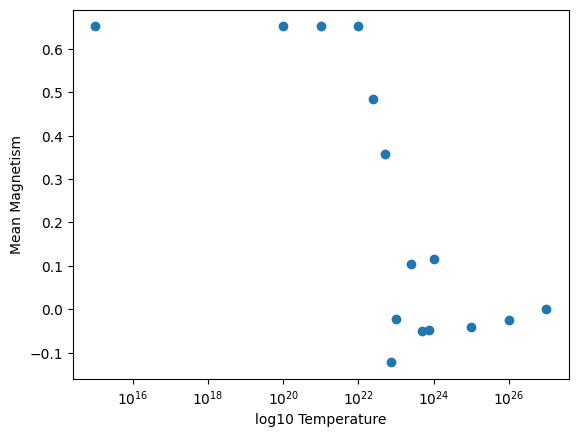

In [5]:
fig, ax = plt.subplots()

mean_energies = []

for temp in data.keys():
    mean_energies.append(data[temp]["magnetism"].mean())

ax.scatter(data.keys(), mean_energies)
ax.set_ylabel("Mean Magnetism")
ax.set_xlabel("log10 Temperature")
ax.set_xscale("log")
# ax.set_ylim(0.1)
# ax.set_ylim(0, -